In [1]:
#print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import seaborn as sns
import pandas as pd
import numpy as np
import xlrd

## Input Files for 6 months

In [2]:
df1  = pd.read_csv('January.csv')
df2  = pd.read_csv('February.csv')
df3  = pd.read_csv('March.csv')
df4  = pd.read_csv('April.csv')
df5  = pd.read_csv('May.csv')
df6  = pd.read_csv('June.csv')
df7  = pd.read_excel('climate-airport2016.xlsx')
df8  = pd.read_csv('L_CANCELLATION.csv')

C:\Users\achou\Anaconda2\envs\gl-env\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#df8  = pd.read_csv('L_CANCELLATION.csv')

In [3]:
df7.to_csv('weathernew.csv',encoding='utf-8')

In [19]:
dfweather = pd.read_csv('weathernew.csv')

In [20]:
dfweather.head()

,Unnamed: 0,CITY,STATE,YEAR,MONTH,DAY_OF_MONTH,TempAvg,DewAvg,HumAvg,SeaLevelAvg,VisibilityAvg,WindAvg,Precip_Inches,Events
0,0,Atlanta,GA,2016,Jan,1,43,32,66,30.22,10,10,0,
1,1,Atlanta,GA,2016,Jan,2,41,26,54,30.24,10,6,0,
2,2,Atlanta,GA,2016,Jan,3,43,26,54,30.08,10,5,0,
3,3,Atlanta,GA,2016,Jan,4,37,22,55,30.17,10,9,0,
4,4,Atlanta,GA,2016,Jan,5,35,13,49,30.48,10,5,0,


In [21]:
dfweather.replace('-',0,inplace=True)

In [22]:
dfweather = dfweather.apply(pd.to_numeric,errors='ignore')

In [23]:
dfweather.TempAvg.unique()

array([ 43,  41,  37,  35,  51,  52,  33,  34,  40,  42,  50,  22,  29,
        44,  39,  31,  46,  45,  48,  60,  63,  38,  47,  53,  59,  49,
        55,  58,  54,  62,  68,  69,  64,  67,  61,  56,  65,  57,  72,
        66,  70,  74,  75,  73,  71,  76,  77,  78,  80,  79,  85,  83,
        82,  81,  86,  84,  87,   0,  25,  26,  27,  32,  13,  12,  20,
         4,   2,   9,  18,  19,  30,  28,  17,  14,  15,  10,  23,  36,
        24,  21,  11,   6,   1,  88,  89,  90,  91,  92,  93,  94,   7,
        16,   8,  -2,  99, 100,  95,  97,  98,  96, 102, 101, 103], dtype=int64)

In [24]:
dfweather['TempAvg'] = pd.to_numeric(dfweather.TempAvg)

In [25]:
dfweather.dtypes

Unnamed: 0         int64
CITY              object
STATE             object
YEAR               int64
MONTH             object
DAY_OF_MONTH       int64
TempAvg            int64
DewAvg             int64
HumAvg             int64
SeaLevelAvg      float64
VisibilityAvg      int64
WindAvg            int64
Precip_Inches     object
Events            object
dtype: object

## Merge Files to a combined dataframe for all 6 months

In [11]:
df=df1.append(df2).append(df3).append(df4).append(df5).append(df6)
#len(df)

# Data Cleaning

## Split the Origin and Destination City from (City, StateCode) format to two columns for City and State

In [12]:
df['ORIGIN_CITY_NAME']=df['ORIGIN_CITY_NAME'].str.split(',', expand=True)

In [13]:
df['DEST_CITY_NAME']=df['DEST_CITY_NAME'].str.split(',', expand=True)

## Get only top 10 Airport Cities

In [14]:
df12=df[df.ORIGIN_CITY_NAME.isin(['Atlanta','Charlotte','Chicago','Dallas','Denver','Las Vegas','Los Angeles','New York','Phoenix','San Francisco'])]
df13=df12[df12.DEST_CITY_NAME.isin(['Atlanta','Charlotte','Chicago','Dallas','Denver','Las Vegas','Los Angeles','New York','Phoenix','San Francisco'])]

In [16]:
dfweather.head()

,Unnamed: 0,City,State,Year,Month,Day,TempAvg,DewAvg,HumAvg,SeaLevelAvg,VisibilityAvg,WindAvg,Precip_Inches,Events
0,0,Atlanta,GA,2016,Jan,1,43,32,66,30.22,10,10,0,
1,1,Atlanta,GA,2016,Jan,2,41,26,54,30.24,10,6,0,
2,2,Atlanta,GA,2016,Jan,3,43,26,54,30.08,10,5,0,
3,3,Atlanta,GA,2016,Jan,4,37,22,55,30.17,10,9,0,
4,4,Atlanta,GA,2016,Jan,5,35,13,49,30.48,10,5,0,


### Transform Month in Weather dataframe : df7 is weather data

In [27]:
dfweather['MONTH'] =dfweather.MONTH.replace({'Jan' : 1, 'Feb' : 2,'Mar' : 3,'Apr' : 4,'May' : 5,'Jun' : 6})
#destinationtemp=df7.copy()

In [28]:
dfweather.head()

,Unnamed: 0,CITY,STATE,YEAR,MONTH,DAY_OF_MONTH,TempAvg,DewAvg,HumAvg,SeaLevelAvg,VisibilityAvg,WindAvg,Precip_Inches,Events
0,0,Atlanta,GA,2016,1,1,43,32,66,30.22,10,10,0,
1,1,Atlanta,GA,2016,1,2,41,26,54,30.24,10,6,0,
2,2,Atlanta,GA,2016,1,3,43,26,54,30.08,10,5,0,
3,3,Atlanta,GA,2016,1,4,37,22,55,30.17,10,9,0,
4,4,Atlanta,GA,2016,1,5,35,13,49,30.48,10,5,0,


### Make a copy of weather data to be used as Destination City weather later

In [29]:
destinationtemp=dfweather.copy()

### Drop the dupliacate STATE column and append ORIGIN_ to weather data column names in df7 (Source city weather)

In [30]:
dfweather=dfweather.drop('STATE',axis=1)
dfweather=dfweather.rename(columns = {'CITY':'ORIGIN_CITY_NAME','TempAvg':'ORIGIN_TempAvg','DewAvg':'ORIGIN_DewAvg','HumAvg':'ORIGIN_HumAvg','SeaLevelAvg':'ORIGIN_SeaLevelAvg','VisibilityAvg':'ORIGIN_VisibilityAvg','WindAvg':'ORIGIN_WindAvg','Precip_Inches':'ORIGIN_Precip_Inches','Events':'ORIGIN_Events'})
df14 = pd.merge(df13, dfweather, how='left', on=['YEAR','MONTH','DAY_OF_MONTH','ORIGIN_CITY_NAME'])

### Drop the dupliacate STATE column and append DEST_ to weather data column names in destinationtemp (Destination City weather)

In [31]:
destinationtemp=destinationtemp.drop('STATE',axis=1)
destinationtemp=destinationtemp.rename(columns = {'CITY':'DEST_CITY_NAME','TempAvg':'DEST_TempAvg','DewAvg':'DEST_DewAvg','HumAvg':'DEST_HumAvg','SeaLevelAvg':'DEST_SeaLevelAvg','VisibilityAvg':'DEST_VisibilityAvg','WindAvg':'DEST_WindAvg','Precip_Inches':'DEST_Precip_Inches','Events':'DEST_Events'})
df15 = pd.merge(df14, destinationtemp, how='left', on=['YEAR','MONTH','DAY_OF_MONTH','DEST_CITY_NAME'])

# Merge the data with lookup tabe of cancellation code to get the text cancellation reason/description

In [32]:
df16 = pd.merge(df15, df8, how='left', on=['CANCELLATION_CODE'])

### drop un-necessary columns

In [33]:
df16['CANCELLATION_DESCRIPTION']=df16.DESCRIPTION
df16=df16.drop('DESCRIPTION',axis=1)
df16=df16.drop('Unnamed: 34',axis=1)

# Final dataframe to work with

In [34]:
df16.columns

Index([u'YEAR', u'MONTH', u'DAY_OF_MONTH', u'DAY_OF_WEEK', u'FL_DATE',
       u'AIRLINE_ID', u'CARRIER', u'FL_NUM', u'ORIGIN_AIRPORT_ID', u'ORIGIN',
       u'ORIGIN_CITY_NAME', u'ORIGIN_STATE_ABR', u'ORIGIN_STATE_NM',
       u'DEST_AIRPORT_ID', u'DEST', u'DEST_CITY_NAME', u'DEST_STATE_ABR',
       u'DEST_STATE_NM', u'DEP_TIME', u'DEP_DELAY', u'DEP_DELAY_NEW',
       u'ARR_TIME', u'ARR_DELAY', u'ARR_DELAY_NEW', u'CANCELLED',
       u'CANCELLATION_CODE', u'DIVERTED', u'AIR_TIME', u'DISTANCE',
       u'CARRIER_DELAY', u'WEATHER_DELAY', u'NAS_DELAY', u'SECURITY_DELAY',
       u'LATE_AIRCRAFT_DELAY', u'Unnamed: 0_x', u'ORIGIN_TempAvg',
       u'ORIGIN_DewAvg', u'ORIGIN_HumAvg', u'ORIGIN_SeaLevelAvg',
       u'ORIGIN_VisibilityAvg', u'ORIGIN_WindAvg', u'ORIGIN_Precip_Inches',
       u'ORIGIN_Events', u'Unnamed: 0_y', u'DEST_TempAvg', u'DEST_DewAvg',
       u'DEST_HumAvg', u'DEST_SeaLevelAvg', u'DEST_VisibilityAvg',
       u'DEST_WindAvg', u'DEST_Precip_Inches', u'DEST_Events',
       u'CANCE

In [35]:
df16.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,AIRLINE_ID,CARRIER,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,Unnamed: 0_y,DEST_TempAvg,DEST_DewAvg,DEST_HumAvg,DEST_SeaLevelAvg,DEST_VisibilityAvg,DEST_WindAvg,DEST_Precip_Inches,DEST_Events,CANCELLATION_DESCRIPTION
0,2016,1,1,5,2016-01-01,19790,DL,1254,12892,LAX,...,0.0,43.0,32.0,66.0,30.22,10.0,10.0,0,,NaN
1,2016,1,1,5,2016-01-01,19790,DL,1262,12892,LAX,...,1464.0,38.0,23.0,52.0,30.03,10.0,8.0,0,,NaN
2,2016,1,1,5,2016-01-01,19790,DL,1279,11259,DAL,...,0.0,43.0,32.0,66.0,30.22,10.0,10.0,0,,NaN
3,2016,1,1,5,2016-01-01,19790,DL,1286,10397,ATL,...,1464.0,38.0,23.0,52.0,30.03,10.0,8.0,0,,NaN
4,2016,1,1,5,2016-01-01,19790,DL,1292,12953,LGA,...,1830.0,21.0,1.0,51.0,30.50,10.0,7.0,0,,NaN


In [36]:
df16.dtypes

YEAR                          int64
MONTH                         int64
DAY_OF_MONTH                  int64
DAY_OF_WEEK                   int64
FL_DATE                      object
AIRLINE_ID                    int64
CARRIER                      object
FL_NUM                        int64
ORIGIN_AIRPORT_ID             int64
ORIGIN                       object
ORIGIN_CITY_NAME             object
ORIGIN_STATE_ABR             object
ORIGIN_STATE_NM              object
DEST_AIRPORT_ID               int64
DEST                         object
DEST_CITY_NAME               object
DEST_STATE_ABR               object
DEST_STATE_NM                object
DEP_TIME                    float64
DEP_DELAY                   float64
DEP_DELAY_NEW               float64
ARR_TIME                    float64
ARR_DELAY                   float64
ARR_DELAY_NEW               float64
CANCELLED                   float64
CANCELLATION_CODE            object
DIVERTED                    float64
AIR_TIME                    

## Change the data type of some weather data so that we can run a model

In [25]:
#X.apply(pd.to_numeric, errors='ignore')

# Linear Regression using OLS for prediction of Delay in arrival of a flight

In [26]:
df16.dtypes

YEAR                          int64
MONTH                         int64
DAY_OF_MONTH                  int64
DAY_OF_WEEK                   int64
FL_DATE                      object
AIRLINE_ID                    int64
CARRIER                      object
FL_NUM                        int64
ORIGIN_AIRPORT_ID             int64
ORIGIN                       object
ORIGIN_CITY_NAME             object
ORIGIN_STATE_ABR             object
ORIGIN_STATE_NM              object
DEST_AIRPORT_ID               int64
DEST                         object
DEST_CITY_NAME               object
DEST_STATE_ABR               object
DEST_STATE_NM                object
DEP_TIME                    float64
DEP_DELAY                   float64
DEP_DELAY_NEW               float64
ARR_TIME                    float64
ARR_DELAY                   float64
ARR_DELAY_NEW               float64
CANCELLED                   float64
CANCELLATION_CODE            object
DIVERTED                    float64
AIR_TIME                    

In [37]:
import statsmodels.formula.api as smf                        
lm1 = smf.ols(formula='ARR_DELAY ~ ORIGIN_TempAvg + ORIGIN_DewAvg + ORIGIN_HumAvg + ORIGIN_SeaLevelAvg + ORIGIN_VisibilityAvg + ORIGIN_WindAvg + DEP_DELAY + DEST_TempAvg + DEST_DewAvg + DEST_HumAvg + DEST_SeaLevelAvg + DEST_VisibilityAvg + DEST_WindAvg', data=df16).fit()                        
lm1.params
print(lm1.summary())

Intercept              -28.163984
ORIGIN_TempAvg           0.292392
ORIGIN_DewAvg           -0.161992
ORIGIN_HumAvg            0.105413
ORIGIN_SeaLevelAvg       0.017443
ORIGIN_VisibilityAvg    -0.431836
ORIGIN_WindAvg           0.223395
DEP_DELAY                1.005145
DEST_TempAvg            -0.046443
DEST_DewAvg              0.023154
DEST_HumAvg              0.017856
DEST_SeaLevelAvg         0.442696
DEST_VisibilityAvg      -0.724441
DEST_WindAvg             0.133440
dtype: float64

                            OLS Regression Results                            
Dep. Variable:              ARR_DELAY   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                 5.146e+04
Date:                Sat, 03 Jun 2017   Prob (F-statistic):               0.00
Time:                        12:00:32   Log-Likelihood:            -4.3284e+05
No. Observations:              105384   AIC:                         8.657e+05
Df Residuals:                  105370   BIC:                         8.658e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept              -28.1640 

In [28]:
#sns.regplot(x='ARR_DELAY',y='DEP_DELAY',data=df)

## Classification for cancelled flights

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
%pylab inline

import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus

Populating the interactive namespace from numpy and matplotlib


In [45]:
df16.groupby('CANCELLATION_DESCRIPTION').size()

CANCELLATION_DESCRIPTION
Carrier                 980
National Air System     481
Weather                2108
dtype: int64

In [46]:
df16.CARRIER.unique()

array(['DL', 'B6', 'AA', 'EV', 'F9', 'VX', 'WN', 'UA', 'OO', 'NK'], dtype=object)

In [47]:
df17 = pd.get_dummies(data=df16, columns=['CANCELLATION_DESCRIPTION','CARRIER'])

In [48]:
df17.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,AIRLINE_ID,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,...,CARRIER_AA,CARRIER_B6,CARRIER_DL,CARRIER_EV,CARRIER_F9,CARRIER_NK,CARRIER_OO,CARRIER_UA,CARRIER_VX,CARRIER_WN
0,2016,1,1,5,2016-01-01,19790,1254,12892,LAX,Los Angeles,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016,1,1,5,2016-01-01,19790,1262,12892,LAX,Los Angeles,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2016,1,1,5,2016-01-01,19790,1279,11259,DAL,Dallas,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016,1,1,5,2016-01-01,19790,1286,10397,ATL,Atlanta,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2016,1,1,5,2016-01-01,19790,1292,12953,LGA,New York,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
df17.columns

Index([u'YEAR', u'MONTH', u'DAY_OF_MONTH', u'DAY_OF_WEEK', u'FL_DATE',
       u'AIRLINE_ID', u'FL_NUM', u'ORIGIN_AIRPORT_ID', u'ORIGIN',
       u'ORIGIN_CITY_NAME', u'ORIGIN_STATE_ABR', u'ORIGIN_STATE_NM',
       u'DEST_AIRPORT_ID', u'DEST', u'DEST_CITY_NAME', u'DEST_STATE_ABR',
       u'DEST_STATE_NM', u'DEP_TIME', u'DEP_DELAY', u'DEP_DELAY_NEW',
       u'ARR_TIME', u'ARR_DELAY', u'ARR_DELAY_NEW', u'CANCELLED',
       u'CANCELLATION_CODE', u'DIVERTED', u'AIR_TIME', u'DISTANCE',
       u'CARRIER_DELAY', u'WEATHER_DELAY', u'NAS_DELAY', u'SECURITY_DELAY',
       u'LATE_AIRCRAFT_DELAY', u'Unnamed: 0_x', u'ORIGIN_TempAvg',
       u'ORIGIN_DewAvg', u'ORIGIN_HumAvg', u'ORIGIN_SeaLevelAvg',
       u'ORIGIN_VisibilityAvg', u'ORIGIN_WindAvg', u'ORIGIN_Precip_Inches',
       u'ORIGIN_Events', u'Unnamed: 0_y', u'DEST_TempAvg', u'DEST_DewAvg',
       u'DEST_HumAvg', u'DEST_SeaLevelAvg', u'DEST_VisibilityAvg',
       u'DEST_WindAvg', u'DEST_Precip_Inches', u'DEST_Events',
       u'CANCELLATION_DESC

In [50]:
df17.isnull().any()

YEAR                                            False
MONTH                                           False
DAY_OF_MONTH                                    False
DAY_OF_WEEK                                     False
FL_DATE                                         False
AIRLINE_ID                                      False
FL_NUM                                          False
ORIGIN_AIRPORT_ID                               False
ORIGIN                                          False
ORIGIN_CITY_NAME                                False
ORIGIN_STATE_ABR                                False
ORIGIN_STATE_NM                                 False
DEST_AIRPORT_ID                                 False
DEST                                            False
DEST_CITY_NAME                                  False
DEST_STATE_ABR                                  False
DEST_STATE_NM                                   False
DEP_TIME                                         True
DEP_DELAY                   

In [36]:
df17.dtypes

YEAR                                              int64
MONTH                                             int64
DAY_OF_MONTH                                      int64
DAY_OF_WEEK                                       int64
FL_DATE                                          object
AIRLINE_ID                                        int64
FL_NUM                                            int64
ORIGIN_AIRPORT_ID                                 int64
ORIGIN                                           object
ORIGIN_CITY_NAME                                 object
ORIGIN_STATE_ABR                                 object
ORIGIN_STATE_NM                                  object
DEST_AIRPORT_ID                                   int64
DEST                                             object
DEST_CITY_NAME                                   object
DEST_STATE_ABR                                   object
DEST_STATE_NM                                    object
DEP_TIME                                        

In [37]:
#df17 = df17.fillna(lambda x:x.mean())

In [38]:
df17.interpolate(method='akima')

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,AIRLINE_ID,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,...,CARRIER_AA,CARRIER_B6,CARRIER_DL,CARRIER_EV,CARRIER_F9,CARRIER_NK,CARRIER_OO,CARRIER_UA,CARRIER_VX,CARRIER_WN
0,2016,1,1,5,2016-01-01,19790,1254,12892,LAX,Los Angeles,...,0,0,1,0,0,0,0,0,0,0
1,2016,1,1,5,2016-01-01,19790,1262,12892,LAX,Los Angeles,...,0,0,1,0,0,0,0,0,0,0
2,2016,1,1,5,2016-01-01,19790,1279,11259,DAL,Dallas,...,0,0,1,0,0,0,0,0,0,0
3,2016,1,1,5,2016-01-01,19790,1286,10397,ATL,Atlanta,...,0,0,1,0,0,0,0,0,0,0
4,2016,1,1,5,2016-01-01,19790,1292,12953,LGA,New York,...,0,0,1,0,0,0,0,0,0,0
5,2016,1,1,5,2016-01-01,19790,1310,12889,LAS,Las Vegas,...,0,0,1,0,0,0,0,0,0,0
6,2016,1,1,5,2016-01-01,19790,1341,10397,ATL,Atlanta,...,0,0,1,0,0,0,0,0,0,0
7,2016,1,1,5,2016-01-01,19790,1349,12889,LAS,Las Vegas,...,0,0,1,0,0,0,0,0,0,0
8,2016,1,1,5,2016-01-01,19790,1354,12892,LAX,Los Angeles,...,0,0,1,0,0,0,0,0,0,0
9,2016,1,1,5,2016-01-01,19790,1382,11292,DEN,Denver,...,0,0,1,0,0,0,0,0,0,0


In [51]:
df17.describe()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,AIRLINE_ID,FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_TIME,DEP_DELAY,...,CARRIER_AA,CARRIER_B6,CARRIER_DL,CARRIER_EV,CARRIER_F9,CARRIER_NK,CARRIER_OO,CARRIER_UA,CARRIER_VX,CARRIER_WN
count,271005.0,271005.000000,271005.000000,271005.000000,271005.000000,271005.000000,271005.000000,271005.000000,267536.000000,267536.000000,...,271005.000000,271005.000000,271005.000000,271005.000000,271005.000000,271005.000000,271005.000000,271005.000000,271005.000000,271005.000000
mean,2016.0,3.570709,15.683906,3.926108,19895.119618,1430.772731,12726.540012,12725.582576,1334.053421,10.616033,...,0.231760,0.035793,0.181572,0.002937,0.032723,0.026918,0.029302,0.155189,0.065431,0.238376
std,0.0,1.705031,8.752150,1.986272,451.022108,1249.768973,1345.939468,1345.517703,520.148525,37.357852,...,0.421957,0.185773,0.385492,0.054117,0.177910,0.161845,0.168652,0.362085,0.247284,0.426091
min,2016.0,1.000000,1.000000,1.000000,19393.000000,1.000000,10397.000000,10397.000000,1.000000,-45.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.0,2.000000,8.000000,2.000000,19790.000000,491.000000,11292.000000,11292.000000,914.000000,-4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2016.0,4.000000,16.000000,4.000000,19805.000000,1071.000000,12892.000000,12892.000000,1324.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2016.0,5.000000,23.000000,6.000000,19977.000000,2001.000000,13930.000000,13930.000000,1746.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2016.0,6.000000,31.000000,7.000000,21171.000000,6899.000000,14771.000000,14771.000000,2400.000000,1313.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
X = df17[['AIR_TIME','DISTANCE','ORIGIN_TempAvg','ORIGIN_DewAvg','ORIGIN_HumAvg','ORIGIN_SeaLevelAvg','ORIGIN_VisibilityAvg','ORIGIN_WindAvg','DEST_TempAvg','DEST_DewAvg','DEST_HumAvg','DEST_SeaLevelAvg','DEST_VisibilityAvg','DEST_WindAvg','CARRIER_AA', 'CARRIER_B6','CARRIER_DL', 'CARRIER_EV', 'CARRIER_F9', 'CARRIER_NK','CARRIER_OO', 'CARRIER_UA', 'CARRIER_VX', 'CARRIER_WN']]

In [53]:
#X = X.apply(pd.to_numeric,errors='ignore')
X = X.apply(lambda x: x.fillna(x.median()),axis=0)

In [54]:
X.ORIGIN_TempAvg.head(50)

0     54.0
1     54.0
2     42.0
3     43.0
4     38.0
5     39.0
6     43.0
7     39.0
8     54.0
9     21.0
10    43.0
11    43.0
12    43.0
13    38.0
14    43.0
15    38.0
16    39.0
17    54.0
18    43.0
19    39.0
20    38.0
21    43.0
22    62.0
23    54.0
24    43.0
25    62.0
26    43.0
27    62.0
28    21.0
29    54.0
30    38.0
31    54.0
32    43.0
33    43.0
34    62.0
35    38.0
36    43.0
37    62.0
38    43.0
39    43.0
40    21.0
41    43.0
42    21.0
43    62.0
44    43.0
45    62.0
46    43.0
47    54.0
48    43.0
49    43.0
Name: ORIGIN_TempAvg, dtype: float64

In [69]:
X.describe()

,AIR_TIME,DISTANCE,ORIGIN_TempAvg,ORIGIN_DewAvg,ORIGIN_HumAvg,ORIGIN_SeaLevelAvg,ORIGIN_VisibilityAvg,ORIGIN_WindAvg,DEST_TempAvg,DEST_DewAvg,...,CARRIER_AA,CARRIER_B6,CARRIER_DL,CARRIER_EV,CARRIER_F9,CARRIER_NK,CARRIER_OO,CARRIER_UA,CARRIER_VX,CARRIER_WN
count,271005.000000,271005.000000,271005.000000,271005.000000,271005.000000,271005.000000,271005.000000,271005.000000,271005.000000,271005.000000,...,271005.000000,271005.000000,271005.000000,271005.000000,271005.000000,271005.000000,271005.000000,271005.000000,271005.000000,271005.000000
mean,144.592668,1089.992727,60.177333,39.604435,55.576126,29.936306,9.533075,6.075585,60.190757,39.621465,...,0.231760,0.035793,0.181572,0.002937,0.032723,0.026918,0.029302,0.155189,0.065431,0.238376
std,83.920475,703.694966,12.365577,13.040607,14.977142,1.333080,1.264553,3.078315,12.358222,13.038960,...,0.421957,0.185773,0.385492,0.054117,0.177910,0.161845,0.168652,0.362085,0.247284,0.426091
min,30.000000,226.000000,7.000000,-16.000000,0.000000,0.000000,0.000000,0.000000,7.000000,-16.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,82.000000,591.000000,57.000000,33.000000,51.000000,29.940000,10.000000,5.000000,57.000000,33.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,115.000000,862.000000,62.000000,40.000000,57.000000,29.990000,10.000000,6.000000,62.000000,40.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,209.000000,1744.000000,65.000000,47.000000,62.000000,30.050000,10.000000,7.000000,65.000000,47.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,423.000000,2586.000000,100.000000,74.000000,100.000000,30.570000,10.000000,23.000000,100.000000,74.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
Y = df17.CANCELLED

In [56]:
Y.unique()

array([ 0.,  1.])

In [57]:
dt = tree.DecisionTreeClassifier(max_depth=3)

In [58]:
dt.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

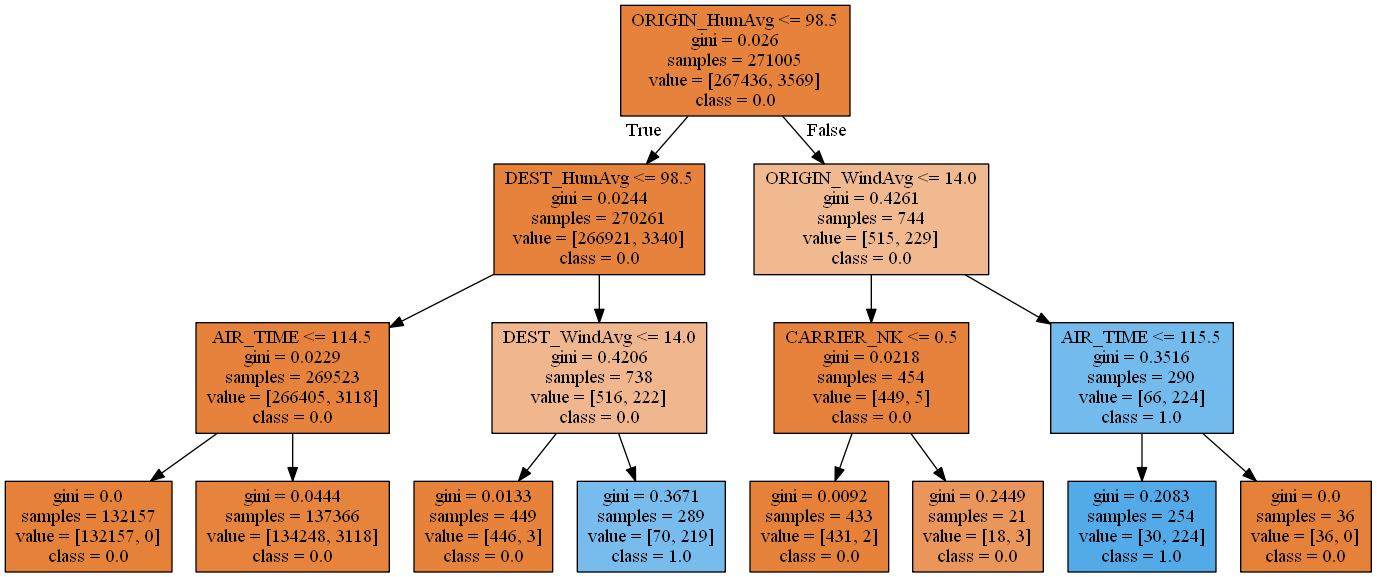

In [59]:
# This code will visualize a decision tree dt, trained with the attributes in X and the class labels in Y
dt_feature_names = list(X.columns)
dt_target_names = np.array(Y.unique(),dtype=np.string_) 
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

# Interesting Insights - 

### If humidity at Source city is less than 98.5 AND humidity at Destination city is also less than 98.5 and (and it doesn't matter much about the airtime), The flight is most likely not to be cancelled. 

### ***** If humidity at source city is less than 98.5 AND humidity at Destination city is more than 98.5 AND wind speed at destination is more than 14, the flight is most likely to be cancelled.

### If humidity at source city is more than 98.5 AND wind speed at source city is more than 14 AND air time is less than 115.5, then the flight tends to be cancelled. BUT if the airtime is more than 115.5, then the flight almost always is not cancelled.

## Clustering

In [60]:
from sklearn.cluster import KMeans

In [62]:
clu = KMeans(n_clusters=3,random_state=2)
clu.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=2, tol=0.0001, verbose=0)

In [63]:
dfcluster = X.copy()

In [64]:
dfcluster['cluster'] = clu.labels_

In [65]:
dfcluster.groupby('cluster').mean()

,DEP_DELAY,ARR_DELAY,AIR_TIME,DISTANCE,ORIGIN_TempAvg,ORIGIN_DewAvg,ORIGIN_HumAvg,ORIGIN_SeaLevelAvg,ORIGIN_VisibilityAvg,ORIGIN_WindAvg,...,CARRIER_AA,CARRIER_B6,CARRIER_DL,CARRIER_EV,CARRIER_F9,CARRIER_NK,CARRIER_OO,CARRIER_UA,CARRIER_VX,CARRIER_WN
cluster,,,,,,,,,,,,,,,,,,,,,
0,10.833981,5.887336,84.928451,576.756263,60.054697,39.275414,55.308125,29.948114,9.561935,6.230370,...,0.195196,0.016211,0.159610,0.004901,0.034786,0.029214,0.043941,0.166112,0.054192,0.295836
1,9.674596,0.111830,297.820535,2387.199347,59.020028,39.540085,55.985336,29.801037,9.201038,5.247333,...,0.359221,0.194653,0.303131,0.000000,0.002565,0.000000,0.000000,0.018395,0.122034,0.000000
2,10.031744,1.072682,204.293530,1613.182709,60.979901,40.353572,55.973156,29.972950,9.623300,6.119612,...,0.252847,0.005250,0.173461,0.000000,0.042137,0.034329,0.010824,0.194475,0.063865,0.222813
